# Ising Model
## System of Non-Interacting Spins

Hamiltonian:
$ H[\{\sigma_i\}] = -B\sum_{i=1}^N \sigma_i $.

Partition function:
$ Z(T,B)=(2 \cosh(\beta B)))^N $.

Free energy per spin:
$ f(T,B)=-k_B T \ln(2 \cosh(\beta B)) $.

Magnetization per spin:
$ m(T,B)= \tanh(\beta B) $.

Susceptibility per spin:
$ \chi(T,B)= \beta (\text{sech}(\beta B))^2 = \beta (\cosh(\beta B))^{-2} $.

Energy per spin:
$\epsilon(T,B)=-B\tanh(\beta B)$.

Specific heat:
$c(T,B)=\frac{B^2}{k_B T^2} (\text{sech}(\beta B))^2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
J = 1.0
kB = 1.0

In [3]:
def Z(T, B, N):
    beta = 1/(kB*T)
    return (2*np.cosh(beta*B))**N

def f(T, B):
    beta = 1/T
    return -kB*T*np.log(2*np.cosh(beta*B))

def m(T, B):
    beta = 1/(kB*T)    
    return np.tanh(beta*B)

def chi(T, B):
    beta = 1/(kB*T)    
    return beta*np.cosh(beta*B)**(-2)

def epsilon(beta, B):
    beta = 1/(kB*T)    
    return -B*np.tanh(beta*B)

def c(beta, B):
    beta = 1/(kB*T)    
    return kB*(beta**2)*(T*np.cosh(beta*B))**(-2)

## Free energy per spin versus the temperature $T$ and the external field $B$

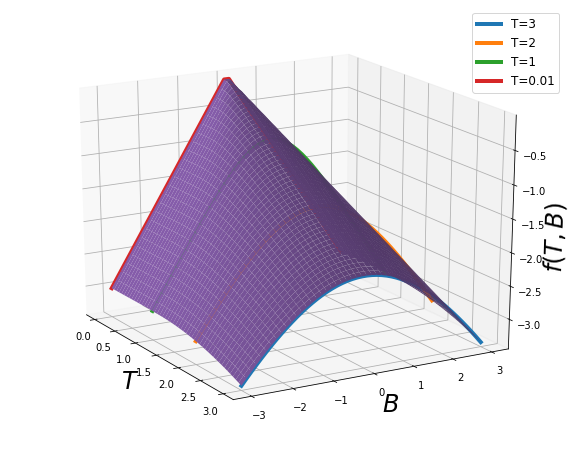

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d',azim=-30, elev=30)

B = np.linspace(-3, 3)
for t in [3, 2, 1, 0.01]:
    T = t*np.ones_like(B)
    ax.plot(T, B, f(T, B), linewidth=4, label=r'T={}'.format(t))

T = np.linspace(0.01, 3)
B = np.linspace(-3, 3)
T, B = np.meshgrid(T, B)
ax.plot_surface(T, B, f(T, B))
# ax.plot_wireframe(T, B, f(T, B), rstride=1, cstride=1)


ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$B$', fontsize=24)
ax.set_zlabel(r'$f(T, B)$', fontsize=24)
ax.legend(fontsize=12)
ax.view_init(elev=20., azim=-30)

## Free energy per spin versus the external field $B$, for various temperature $T$

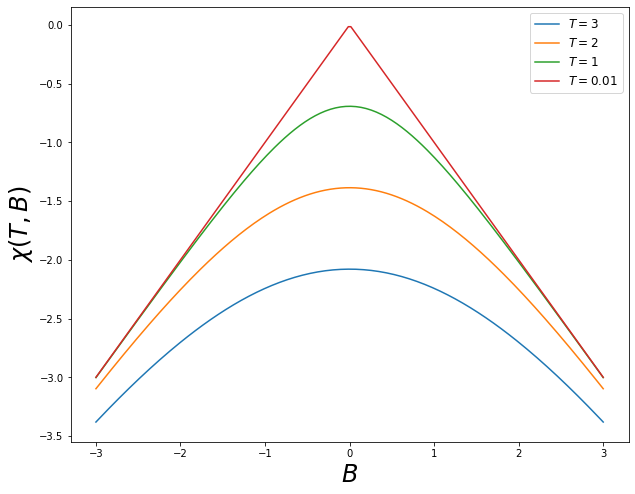

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

B = np.linspace(-3, 3, 200)
for T in [3, 2, 1, 0.01]:
    ax.plot(B, f(T, B), label=r'$T={}$'.format(T))

ax.set_xlabel(r'$B$', fontsize='24')
ax.set_ylabel(r'$\chi(T, B)$', fontsize='24')
ax.legend(fontsize=12)

## Magnetization per spin versus the external field, for various temperature

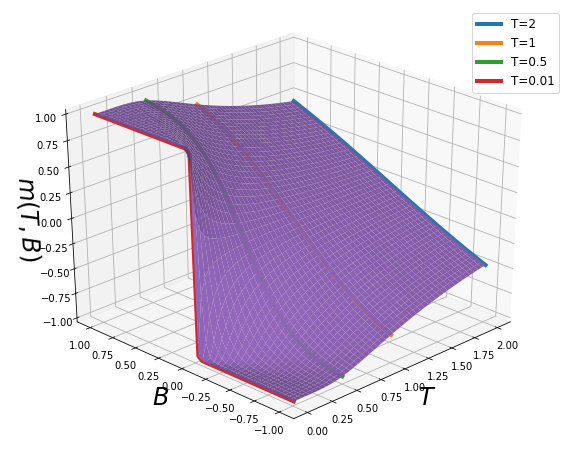

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d',azim=-30, elev=30)

B = np.linspace(-1, 1)
for t in [2, 1, 0.5, 0.01]:
    T = t*np.ones_like(B)
    ax.plot(T, B, m(T, B), linewidth=4, label=r'T={}'.format(t))

T = np.linspace(0.01, 2)
B = np.linspace(-1, 1)
T, B = np.meshgrid(T, B)
ax.plot_surface(T, B, m(T, B))

ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$B$', fontsize=24)
ax.set_zlabel(r'$m(T, B)$', fontsize=24)
ax.legend(fontsize=12)
ax.view_init(elev=30., azim=-135)

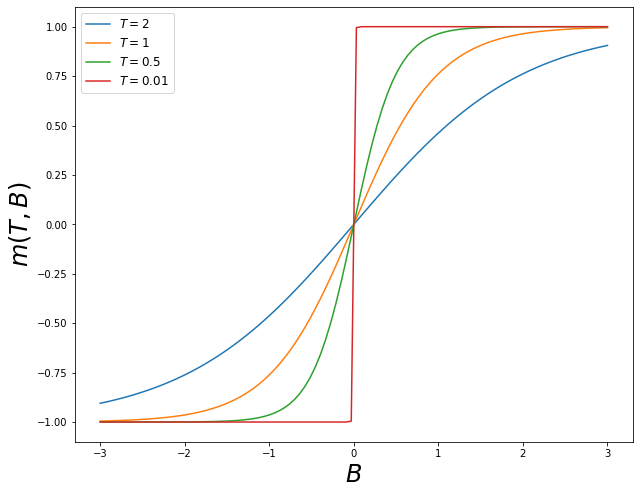

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

B = np.linspace(-3, 3, 100)
for T in [2, 1, 0.5, 0.01]:
    ax.plot(B, m(T, B), label=r'$T={}$'.format(T))

ax.set_xlabel(r'$B$', fontsize='24')
ax.set_ylabel(r'$m(T, B)$', fontsize='24')
ax.legend(fontsize=12)

## Susceptibility per spin versus the external field, for various temperature

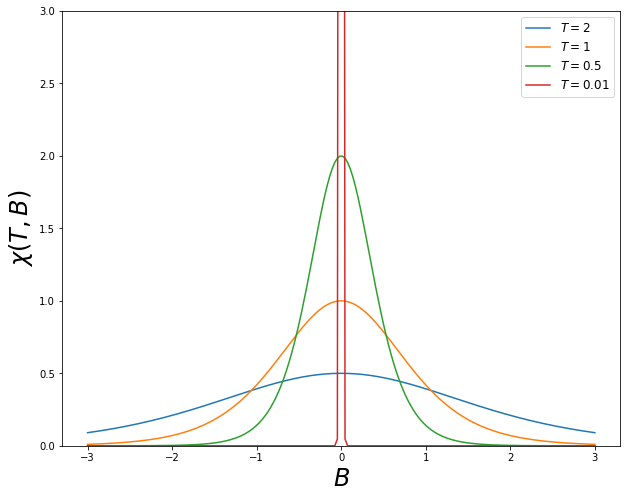

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

B = np.linspace(-3, 3, 200)
for T in [2, 1, 0.5, 0.01]:
    ax.plot(B, chi(T, B), label=r'$T={}$'.format(T))

ax.set_xlabel(r'$B$', fontsize='24')
ax.set_ylabel(r'$\chi(T, B)$', fontsize='24')
ax.set_ylim([0, 3])
ax.legend(fontsize=12)

## Magnetization per spin versus the temperature, at various external field

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


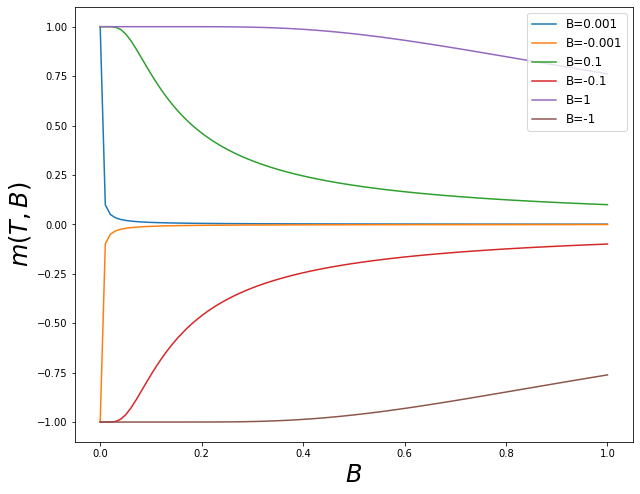

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0, 1, 100)
for B in [0.001, 0.1, 1]:
    ax.plot(T, m(T, B), label=r'B={}'.format(B))
    ax.plot(T, m(T, -B), label=r'B={}'.format(-B))    

ax.set_xlabel(r'$B$', fontsize='24')
ax.set_ylabel(r'$m(T, B)$', fontsize='24')
ax.legend(fontsize=12)

## Energy per spin versus temperature, for various temperature

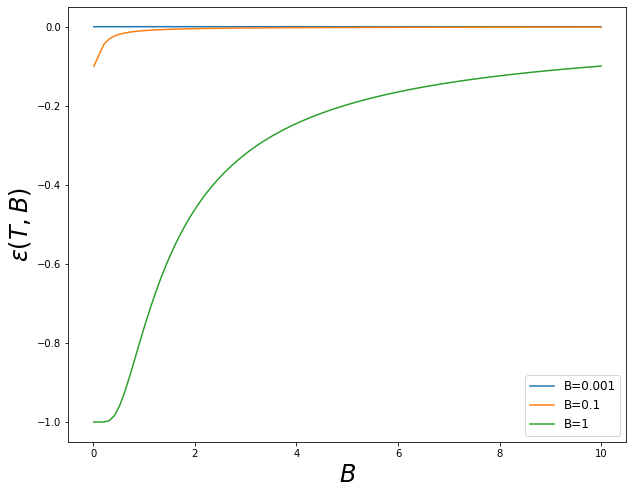

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.01, 10, 100)
for B in [0.001, 0.1, 1]:
    ax.plot(T, epsilon(T, B), label=r'B={}'.format(B))

ax.set_xlabel(r'$B$', fontsize=24)
ax.set_ylabel(r'$\epsilon(T, B)$', fontsize=24)
ax.legend(fontsize=12)

## Specific heat per spin versus temperature, for various temperature

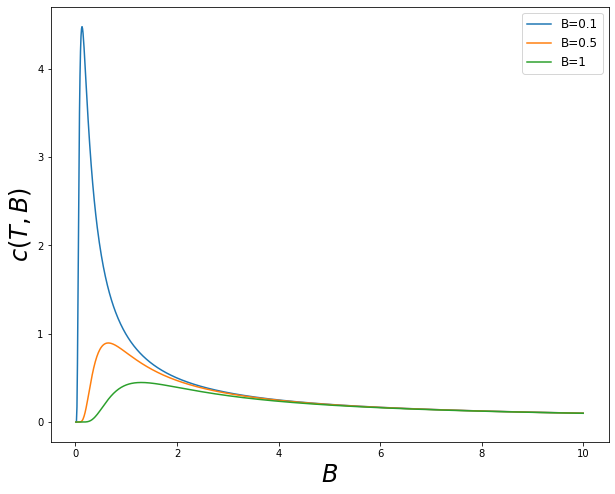

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.01, 10, 1000)
for B in [0.1, 0.5, 1]:
    ax.plot(T, chi(T, B), label=r'B={}'.format(B))

ax.set_xlabel(r'$B$', fontsize=24)
ax.set_ylabel(r'$c(T, B)$', fontsize=24)
ax.legend(fontsize=12)